In [34]:
from collections import OrderedDict

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "/home/blackcerberus/Documents/Documents/DS_python/cnn_numpy/dataset/plant_diseases/data_files/plant_diseases_train.csv"

train_df = pd.read_csv(path)
train_df = train_df[['Filename', 'Class', 'Label']]
train_df.head(10)

,Filename,Class,Label
0,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
1,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
2,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
3,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
4,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
5,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
6,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
7,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
8,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24
9,dataset/plant_diseases/train/Soybean___healthy...,Soybean___healthy,24


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70295 entries, 0 to 70294
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Filename  70295 non-null  object
 1   Class     70295 non-null  object
 2   Label     70295 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [36]:
label_class = train_df["Class"].value_counts()
label_class = label_class.reset_index()
label_class = pd.DataFrame(label_class)
label_class

,index,Class
0,Soybean___healthy,2022
1,Apple___apple_scab,2016
2,Orange___haunglongbing_(citrus_greening),2010
3,Apple___healthy,2008
4,Pepper_bell___healthy,1988
5,Apple___black_rot,1987
6,Tomato___tomato_yellow_leaf_curl_virus,1961
7,Potato___early_blight,1939
8,Potato___late_blight,1939
9,Tomato___healthy,1926


Text(0.5, 0, 'Number of images')

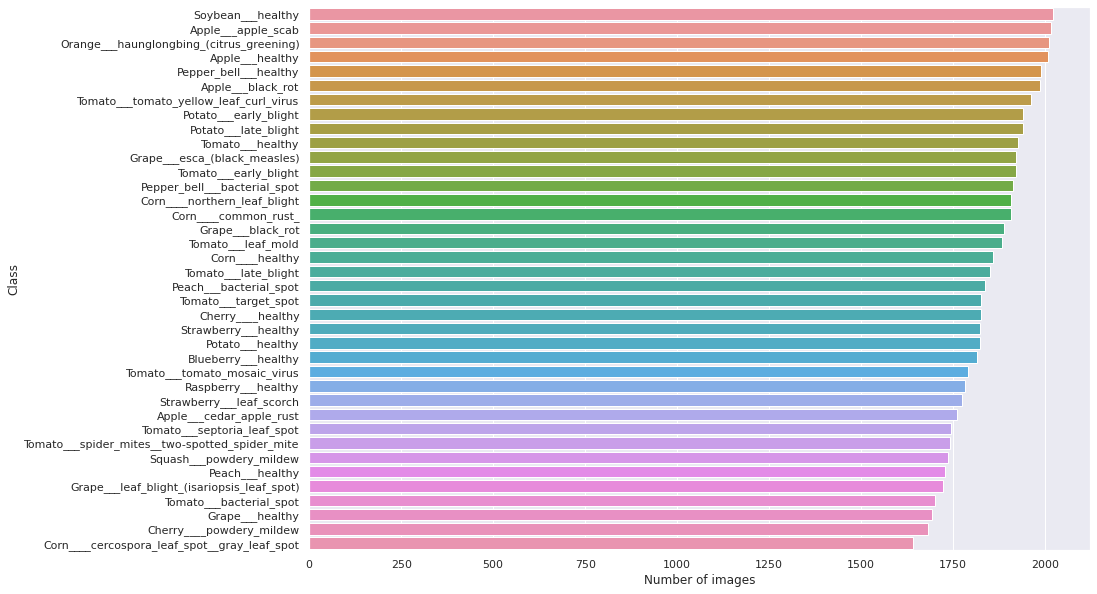

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 10))
sns.barplot(
    x = "Class",
    y = "index",
    data = label_class,
)
plt.ylabel("Class")
plt.xlabel("Number of images")

In [38]:
num_classes = len(label_class.index)
print(f"Number of classes: {num_classes}")

Number of classes: 38


In [39]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

data_dir = "/home/blackcerberus/Documents/Documents/DS_python/cnn_numpy/dataset/plant_diseases/"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

train

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /home/blackcerberus/Documents/Documents/DS_python/cnn_numpy/dataset/plant_diseases//train
    StandardTransform
Transform: ToTensor()

In [40]:
valid

Dataset ImageFolder
    Number of datapoints: 9000
    Root location: /home/blackcerberus/Documents/Documents/DS_python/cnn_numpy/dataset/plant_diseases//valid
    StandardTransform
Transform: ToTensor()

In [41]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


Label :Apple___healthy(3)


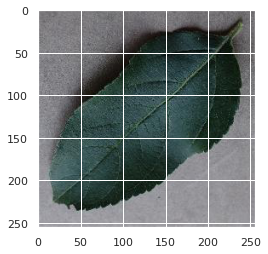

In [42]:
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

show_image(*train[7000])

In [43]:
from torch.utils.data import DataLoader
import torch
from torch import nn
from collections import OrderedDict

batch_size = 64
torch.manual_seed(1)
dl_train = DataLoader(train, batch_size=batch_size, shuffle=True,num_workers=1)
dl_valid = DataLoader(valid, batch_size=batch_size, shuffle=True, num_workers=1)
device = torch.device("cpu")



In [44]:
model = nn.Sequential(OrderedDict([
    ('conv1', nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0)),
    ('relu1', nn.ReLU()),
    ('pool1', nn.MaxPool2d(kernel_size=3, stride=2)),
    ('conv2', nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5,stride=1, padding=2)),
    ('relu2', nn.ReLU()),
    ('pool2', nn.MaxPool2d(kernel_size=3, stride=2)),
    ('conv3', nn.Conv2d(in_channels=256,out_channels=384, kernel_size=3, stride=1, padding=1)),
    ('relu3', nn.ReLU()),
    ('conv4', nn.Conv2d(in_channels=384,out_channels=384, kernel_size=3, stride=1, padding=1)),
    ('relu4', nn.ReLU()),
    ('conv5', nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)),
    ('relu5', nn.ReLU()),
    ('pool3', nn.MaxPool2d(kernel_size=3,stride=2)),


    #Fully-connected
    ('flatten', nn.Flatten()),
    ('fc1', nn.Linear(in_features=9216, out_features=9216)),
    ('relu6', nn.ReLU()),
    ('dropout', nn.Dropout(p=0.5)),
    ('fc2', nn.Linear(in_features=9216, out_features=9216)),
    ('relu7', nn.ReLU()),
    ('dropout', nn.Dropout(p=0.5)),
    ('fc3', nn.Linear(in_features=9216, out_features=num_classes)),
]))

In [45]:
from torchsummary import summary

print(summary(model.cpu(), (3, 256, 256)))


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 96, 62, 62]          34,944
├─ReLU: 1-2                              [-1, 96, 62, 62]          --
├─MaxPool2d: 1-3                         [-1, 96, 30, 30]          --
├─Conv2d: 1-4                            [-1, 256, 30, 30]         614,656
├─ReLU: 1-5                              [-1, 256, 30, 30]         --
├─MaxPool2d: 1-6                         [-1, 256, 14, 14]         --
├─Conv2d: 1-7                            [-1, 384, 14, 14]         885,120
├─ReLU: 1-8                              [-1, 384, 14, 14]         --
├─Conv2d: 1-9                            [-1, 384, 14, 14]         1,327,488
├─ReLU: 1-10                             [-1, 384, 14, 14]         --
├─Conv2d: 1-11                           [-1, 256, 14, 14]         884,992
├─ReLU: 1-12                             [-1, 256, 14, 14]         --
├─MaxPool2d: 1-13                        [-1, 256, 6, 6]   

In [46]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 5
hist = train(model, num_epochs, dl_train, dl_valid)

KeyboardInterrupt: 

In [ ]:
import numpy as np

x_arr = np.arange(len(hist[0])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/14_13.png')
plt.show()